In [64]:
#importing library
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#importing data set
df = pd.read_json('Contact Tracing Dataset.json')

df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [66]:
#cheching data is clean or not
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

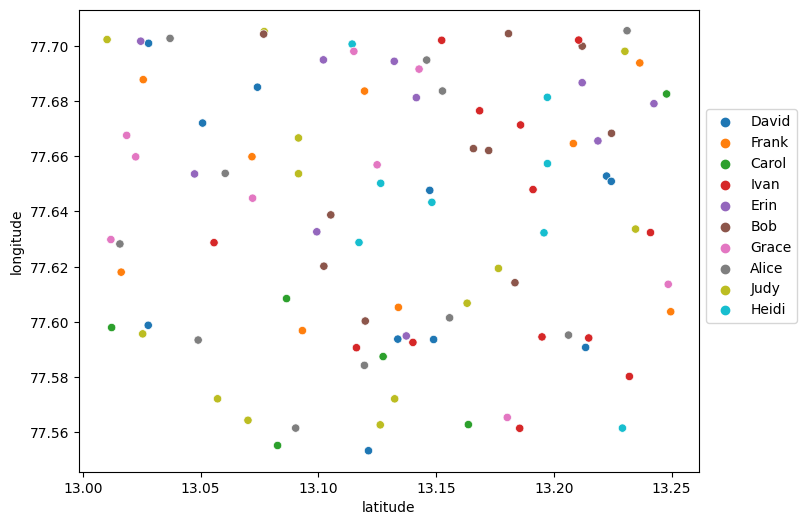

In [67]:
#ow, let’s analyze the dataset using the scatter plot showing the ids with their latitudes and longitudes on the x-axis and the Y-axis respectively
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

In [71]:
'''Now let's create a model for contact tracing using the DBSCAN model. 
The function below will help us to create the DBSCAN model, using this model we will generate clusters, which will help
identify infections by filtering the data in the clusters'''
def contact_tracing(input_name):
    global model
    epsilon = 0.0018288  # Adjust this parameter based on your data and disease characteristics
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    # Find the cluster of the input individual
    input_cluster = df.loc[df['id'] == input_name, 'cluster'].iloc[0]

    # Find individuals in the same cluster as the input individual
    close_contacts = df.loc[df['cluster'] == input_cluster, 'id'].unique().tolist()

    # Remove the input individual from the list of close contacts
    close_contacts.remove(input_name)

    return close_contacts

c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amins\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

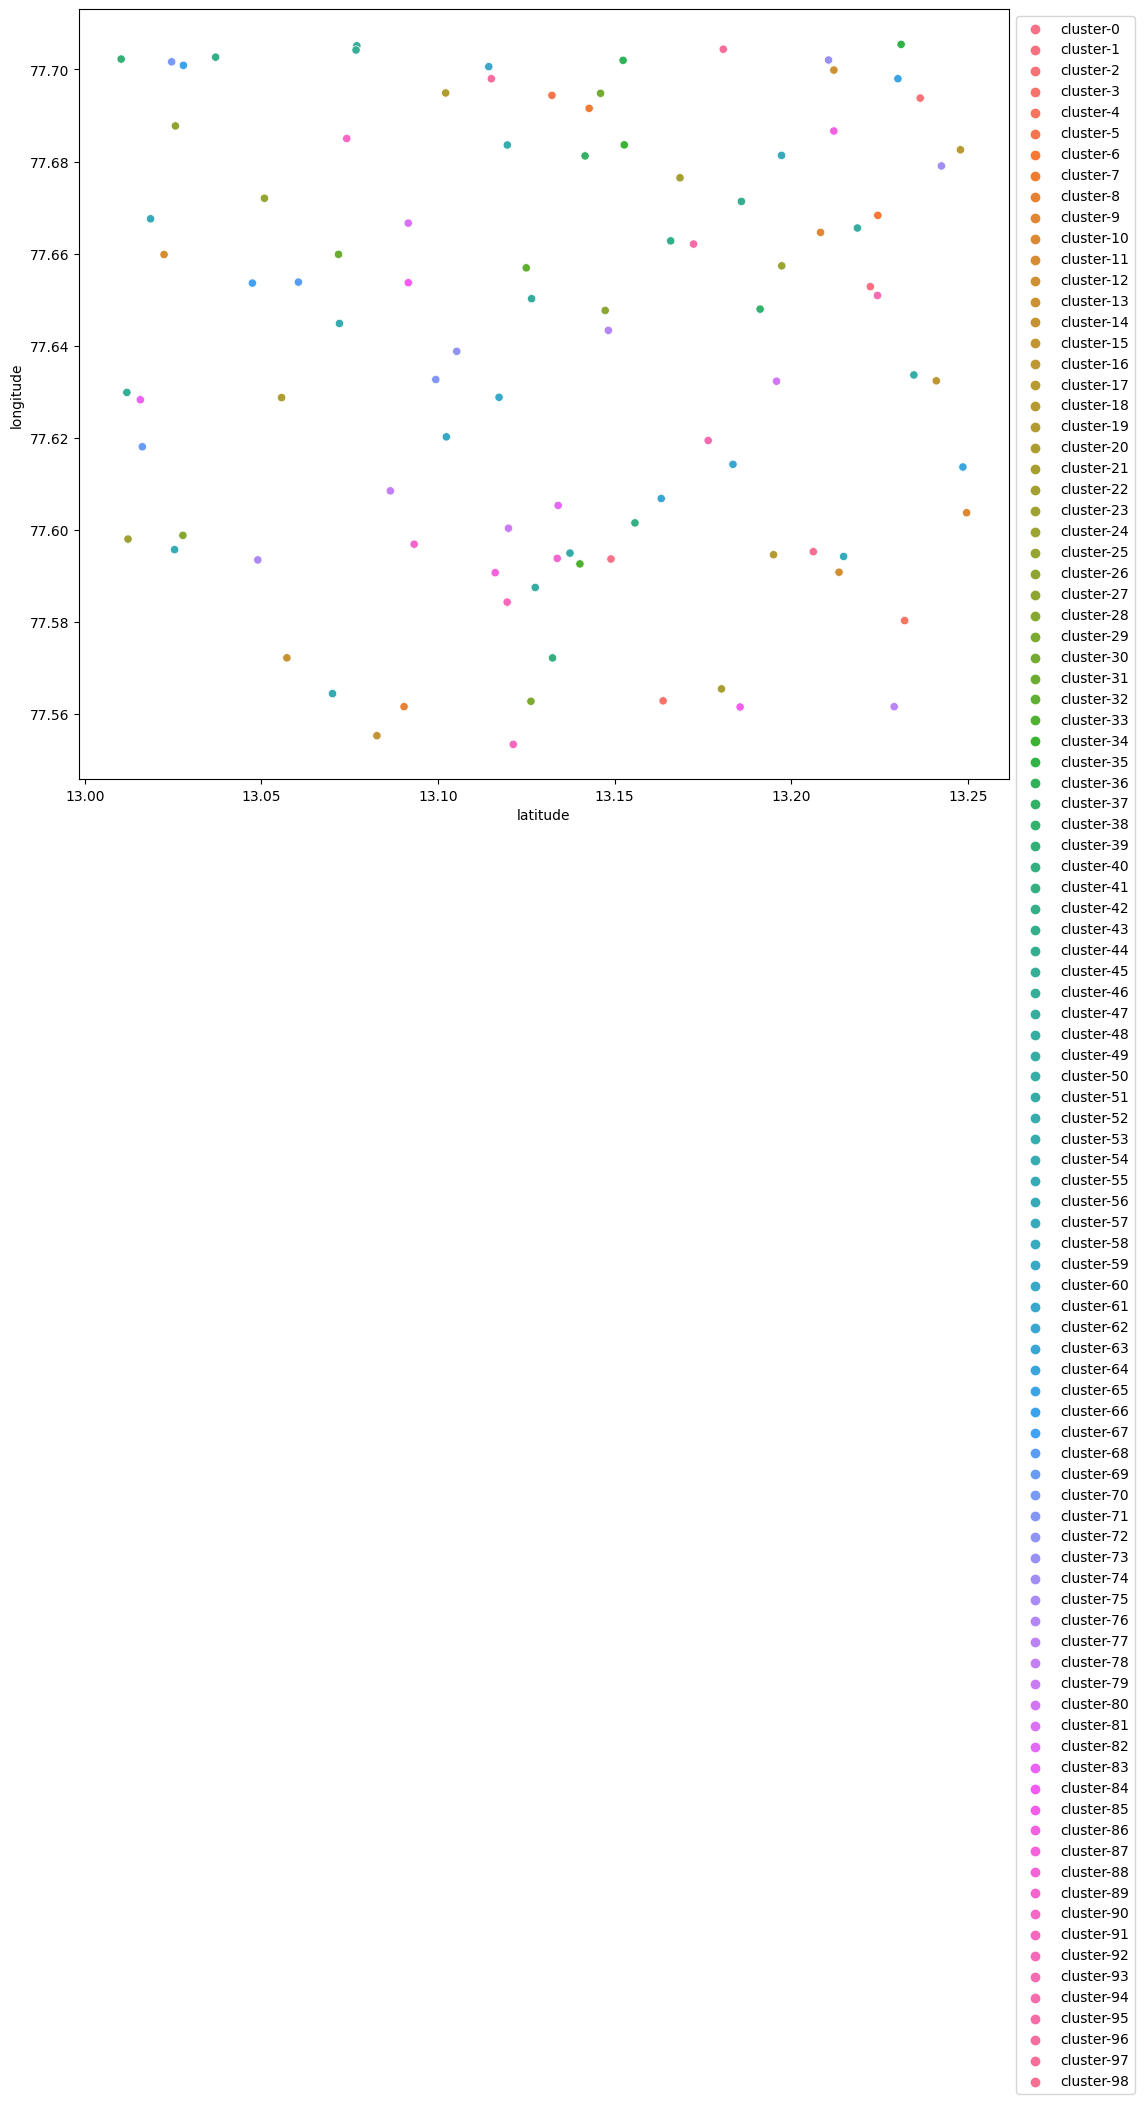

In [72]:
#Now, let’s generate clusters using our model
labels = model.labels_
fig = plt.figure(figsize=(12, 10))
hue_labels = ['cluster-{}'.format(x) for x in labels]  # Correct the hue labels
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=hue_labels)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [75]:
#Tracing Infected People
input_name = "David"
close_contacts = contact_tracing(input_name)
print(f"Close contacts of {input_name}: {close_contacts}")

Close contacts of David: ['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
